In [1]:
import pandas as pd
import requests
!pip install pyreadstat
!pip install mglearn
import pyreadstat
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler,StandardScaler,normalize

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import statsmodels.api as sm
import mglearn
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, precision_score,matthews_corrcoef,roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:

# URL of the .sav file
url = "https://figshare.com/ndownloader/files/43924833"
output_filename = "spss_data.sav"

# Download the .sav file
response = requests.get(url)

if response.status_code == 200:
    with open(output_filename, 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file. Status code:", response.status_code)

File downloaded successfully.


In [4]:
df = pd.read_spss("spss_data.sav")
df

,Group,Age,Weight,BMI,Sex,Height,MinHR,AverageHR,MaxHR,SleeptimeawakeHR,...,RMSSD,PNN50,Sleeplatencyperiod,Wakeupafterfallsleep,Remperiod,LightsleepN1andN2period,DeepsleepN3period,Sleepefficiency,Totalsleepmonitoringtimemins,Totalsleeptime
0,Patient Group,49.0,60.0,25.0,Male,170.0,36.0,78.0,103.0,78.0,...,58.0,29.67,30.5,332.5,21.0,7.5,29.0,54.3,420.0,57.0
1,Patient Group,45.0,55.0,21.5,Male,160.0,37.0,56.0,80.0,59.0,...,59.0,39.67,115.0,37.0,27.0,173.0,68.0,87.9,420.0,268.0
2,Patient Group,54.0,60.0,23.0,Female,162.0,33.0,59.0,85.0,66.0,...,52.0,37.00,35.0,119.0,73.0,124.0,70.0,72.0,420.0,267.0
3,Patient Group,46.0,58.0,22.0,Male,164.0,34.0,53.0,88.0,54.0,...,73.0,23.00,10.0,127.0,50.0,159.0,75.0,80.5,420.0,284.0
4,Patient Group,61.0,60.0,23.0,Female,160.0,49.0,70.0,100.0,75.0,...,32.0,11.00,0.0,104.0,90.0,157.0,69.0,81.3,420.0,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Group                         327 non-null    category
 1   Age                           327 non-null    float64 
 2   Weight                        327 non-null    float64 
 3   BMI                           327 non-null    float64 
 4   Sex                           327 non-null    category
 5   Height                        327 non-null    float64 
 6   MinHR                         327 non-null    float64 
 7   AverageHR                     327 non-null    float64 
 8   MaxHR                         327 non-null    float64 
 9   SleeptimeawakeHR              327 non-null    float64 
 10  SleeptimeHRprofileREM         327 non-null    float64 
 11  SleeptimeHRprofileN1andN2     327 non-null    float64 
 12  SleeptimeHRprofileN3          327 non-null    floa

In [6]:
#Counting NAN Data
df.isna().sum()

Group                           9
Age                             9
Weight                          9
BMI                             9
Sex                             9
Height                          9
MinHR                           9
AverageHR                       9
MaxHR                           9
SleeptimeawakeHR                9
SleeptimeHRprofileREM           9
SleeptimeHRprofileN1andN2       9
SleeptimeHRprofileN3            9
LF                              9
HF                              9
LFHFratio                       9
IBI                             9
SDNN                            9
HTI                             9
RMSSD                           9
PNN50                           9
Sleeplatencyperiod              9
Wakeupafterfallsleep            9
Remperiod                       9
LightsleepN1andN2period         9
DeepsleepN3period               9
Sleepefficiency                 9
Totalsleepmonitoringtimemins    9
Totalsleeptime                  9
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

123

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,Group,Age,Weight,BMI,Sex,Height,MinHR,AverageHR,MaxHR,SleeptimeawakeHR,...,RMSSD,PNN50,Sleeplatencyperiod,Wakeupafterfallsleep,Remperiod,LightsleepN1andN2period,DeepsleepN3period,Sleepefficiency,Totalsleepmonitoringtimemins,Totalsleeptime
0,Patient Group,49.0,60.0,25.0,Male,170.0,36.0,78.0,103.0,78.0,...,58.0,29.67,30.5,332.5,21.0,7.5,29.0,54.30,420.0,57.0
1,Patient Group,45.0,55.0,21.5,Male,160.0,37.0,56.0,80.0,59.0,...,59.0,39.67,115.0,37.0,27.0,173.0,68.0,87.90,420.0,268.0
2,Patient Group,54.0,60.0,23.0,Female,162.0,33.0,59.0,85.0,66.0,...,52.0,37.00,35.0,119.0,73.0,124.0,70.0,72.00,420.0,267.0
3,Patient Group,46.0,58.0,22.0,Male,164.0,34.0,53.0,88.0,54.0,...,73.0,23.00,10.0,127.0,50.0,159.0,75.0,80.50,420.0,284.0
4,Patient Group,61.0,60.0,23.0,Female,160.0,49.0,70.0,100.0,75.0,...,32.0,11.00,0.0,104.0,90.0,157.0,69.0,81.30,420.0,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Control Group,67.0,75.0,26.0,Male,170.0,36.0,50.0,73.0,54.0,...,20.0,0.67,19.0,140.0,31.0,156.0,75.0,85.50,420.0,261.0
316,Control Group,65.0,65.0,24.0,Male,165.0,68.0,88.0,117.0,88.0,...,35.0,13.00,7.0,55.0,44.0,229.0,84.0,95.90,420.0,363.0
317,Control Group,67.0,77.0,27.0,Female,170.0,51.0,68.0,105.0,81.0,...,32.0,8.00,52.0,74.0,76.0,162.0,55.0,80.87,420.0,344.0
319,Control Group,65.0,70.0,22.0,Male,178.0,41.0,59.0,77.0,73.0,...,37.0,11.00,138.0,59.0,62.0,99.0,63.0,79.00,420.0,224.0


In [11]:
#Basic Statistic
df.describe()

,Age,Weight,BMI,Height,MinHR,AverageHR,MaxHR,SleeptimeawakeHR,SleeptimeHRprofileREM,SleeptimeHRprofileN1andN2,...,RMSSD,PNN50,Sleeplatencyperiod,Wakeupafterfallsleep,Remperiod,LightsleepN1andN2period,DeepsleepN3period,Sleepefficiency,Totalsleepmonitoringtimemins,Totalsleeptime
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0,204.000000
mean,59.867647,70.450980,25.030882,167.696078,42.715686,64.034314,97.240196,69.102941,65.843137,63.465686,...,40.044118,16.019853,41.995098,80.519608,75.161765,157.823529,63.541667,83.385000,420.0,314.215686
std,9.239940,14.785912,4.853619,6.278887,9.158030,11.947496,26.041387,12.783695,12.244428,12.072596,...,19.657236,14.263591,46.684983,55.528891,41.933073,43.791301,11.573580,12.237017,0.0,69.316580
min,40.000000,45.000000,17.000000,150.000000,30.000000,45.000000,67.000000,48.000000,46.000000,46.000000,...,13.000000,0.000000,0.000000,0.000000,4.000000,7.500000,20.000000,42.600000,420.0,57.000000
25%,53.000000,60.000000,22.000000,163.000000,36.000000,57.000000,84.000000,61.000000,58.750000,57.000000,...,26.000000,5.000000,7.000000,40.000000,44.000000,137.000000,56.000000,76.600000,420.0,271.000000
50%,60.000000,70.000000,24.750000,170.000000,41.000000,62.000000,92.000000,67.000000,62.500000,62.000000,...,34.000000,11.000000,26.000000,68.000000,66.000000,164.000000,65.000000,84.850000,420.0,320.000000
75%,67.000000,79.250000,27.000000,172.000000,48.000000,68.000000,102.250000,76.000000,73.000000,68.000000,...,50.000000,23.000000,60.250000,106.000000,101.000000,187.000000,70.000000,93.200000,420.0,367.000000
max,79.000000,163.000000,61.000000,180.000000,68.000000,132.000000,220.000000,132.000000,124.000000,138.000000,...,116.000000,61.000000,241.000000,332.500000,184.000000,230.000000,85.000000,100.000000,420.0,420.000000


In [12]:
df.columns

Index(['Group', 'Age', 'Weight', 'BMI', 'Sex', 'Height', 'MinHR', 'AverageHR',
       'MaxHR', 'SleeptimeawakeHR', 'SleeptimeHRprofileREM',
       'SleeptimeHRprofileN1andN2', 'SleeptimeHRprofileN3', 'LF', 'HF',
       'LFHFratio', 'IBI', 'SDNN', 'HTI', 'RMSSD', 'PNN50',
       'Sleeplatencyperiod', 'Wakeupafterfallsleep', 'Remperiod',
       'LightsleepN1andN2period', 'DeepsleepN3period', 'Sleepefficiency',
       'Totalsleepmonitoringtimemins', 'Totalsleeptime'],
      dtype='object')

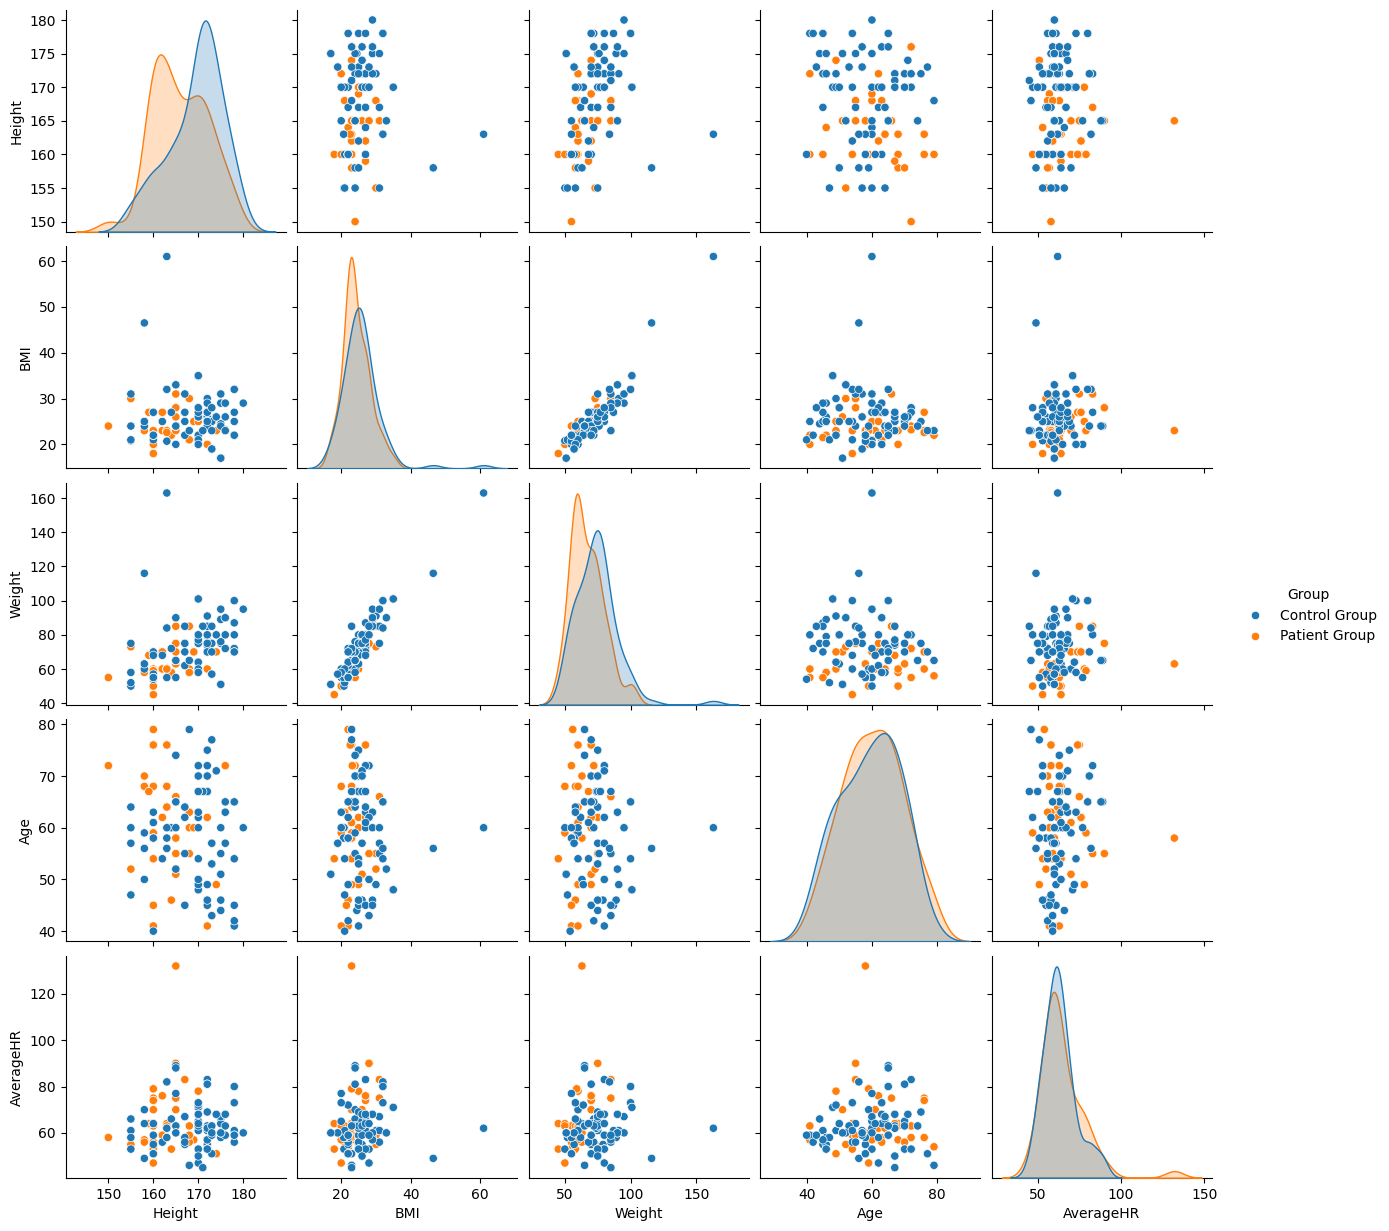

In [13]:
sns.pairplot(df, vars = ['Height','BMI', 'Weight', 'Age','AverageHR'], hue = "Group")

Text(0, 0.5, 'count')

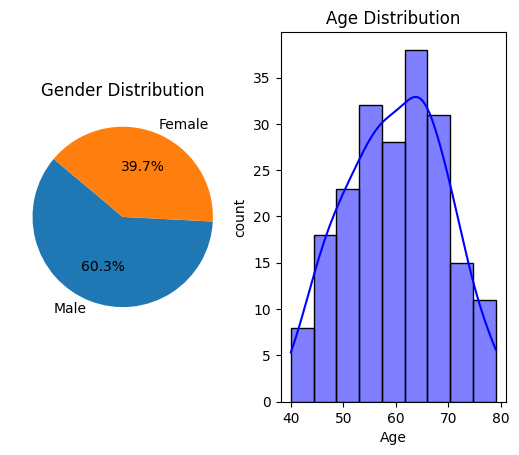

In [14]:
plt.subplot(1,2,1)
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.subplot(1,2,2)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("count")

Text(0, 0.5, 'count')

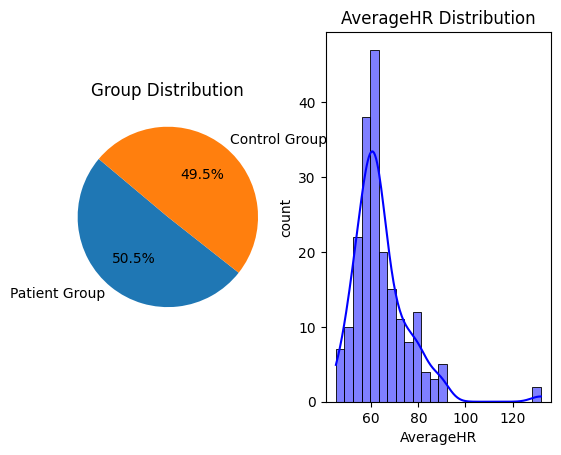

In [15]:
plt.subplot(1,2,1)
plt.pie(df['Group'].value_counts(), labels=df['Group'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Group Distribution')
plt.subplot(1,2,2)
sns.histplot(df['AverageHR'], kde=True, color='blue')
plt.title('AverageHR Distribution')
plt.xlabel("AverageHR")
plt.ylabel("count")

In [16]:
# Assuming df is your DataFrame and num_col contains numerical column names
num_col = [ 'Age', 'Weight', 'BMI', 'Height', 'MinHR', 'AverageHR',
       'MaxHR', 'SleeptimeawakeHR', 'SleeptimeHRprofileREM',
       'SleeptimeHRprofileN1andN2', 'SleeptimeHRprofileN3', 'LF', 'HF',
       'LFHFratio', 'IBI', 'SDNN', 'HTI', 'RMSSD', 'PNN50',
       'Sleeplatencyperiod', 'Wakeupafterfallsleep', 'Remperiod',
       'LightsleepN1andN2period', 'DeepsleepN3period', 'Sleepefficiency',
       'Totalsleepmonitoringtimemins', 'Totalsleeptime']

# Calculate Q1, Q3, and IQR for numerical columns
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

# Filter data to remove outliers based on the IQR rule
df_no = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no.shape

(112, 29)

In [17]:
label_encoder=LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

cat_cols=['Sex','Group']
for col in cat_cols:
    df_no[col] = label_encoder.fit_transform(df_no[col])

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

<ipython-input-17-ac855195fb37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no[col] = label_encoder.fit_transform(df_no[col])
<ipython-input-17-ac855195fb37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no[col] = label_encoder.fit_transform(df_no[col])


In [18]:
scaler = MinMaxScaler()
df_no = pd.DataFrame(scaler.fit_transform(df_no), columns=df_no.columns)


df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_no

,Group,Age,Weight,BMI,Sex,Height,MinHR,AverageHR,MaxHR,SleeptimeawakeHR,...,RMSSD,PNN50,Sleeplatencyperiod,Wakeupafterfallsleep,Remperiod,LightsleepN1andN2period,DeepsleepN3period,Sleepefficiency,Totalsleepmonitoringtimemins,Totalsleeptime
0,1.0,0.538462,0.272727,0.333333,0.0,0.357143,0.59375,0.657143,0.545455,0.54,...,0.296875,0.289474,0.000000,0.535519,0.506173,0.547445,0.68,0.603467,0.0,0.624031
1,1.0,0.589744,0.236364,0.200000,1.0,0.642857,0.00000,0.257143,1.000000,0.14,...,0.265625,0.236842,0.188406,0.163934,0.660494,0.671533,0.70,0.858121,0.0,0.786822
2,1.0,0.820513,0.181818,0.400000,1.0,0.000000,0.34375,0.314286,0.345455,0.40,...,0.343750,0.368421,0.028986,0.169399,0.771605,0.729927,0.60,0.815322,0.0,0.872093
3,1.0,0.487179,0.090909,0.133333,0.0,0.357143,0.09375,0.000000,0.000000,0.00,...,0.531250,0.868421,0.000000,0.366120,0.716049,0.598540,0.50,0.635566,0.0,0.748062
4,1.0,0.358974,0.000000,0.000000,0.0,0.357143,0.68750,0.485714,0.327273,0.36,...,0.203125,0.105263,0.688406,0.262295,0.098765,0.700730,0.70,0.682645,0.0,0.449612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.538462,0.418182,0.600000,0.0,0.357143,0.46875,0.485714,0.418182,0.34,...,0.312500,0.315789,0.028986,0.808743,0.469136,0.204380,0.68,0.590627,0.0,0.414729
108,0.0,0.641026,0.454545,0.266667,0.0,1.000000,0.34375,0.342857,0.127273,0.18,...,0.375000,0.289474,1.000000,0.289617,0.333333,0.124088,0.56,0.556388,0.0,0.267442
109,0.0,0.692308,0.545455,0.533333,1.0,0.714286,0.18750,0.085714,0.054545,0.12,...,0.109375,0.017632,0.137681,0.732240,0.141975,0.540146,0.80,0.693345,0.0,0.410853
110,0.0,0.692308,0.581818,0.600000,0.0,0.714286,0.65625,0.600000,0.636364,0.66,...,0.296875,0.210526,0.376812,0.371585,0.419753,0.583942,0.40,0.594265,0.0,0.732558


**K-mean Clustering**
- Score Inertia

- Cluster Balence

In [19]:
X1 = df_no.iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.5,  random_state= 50  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


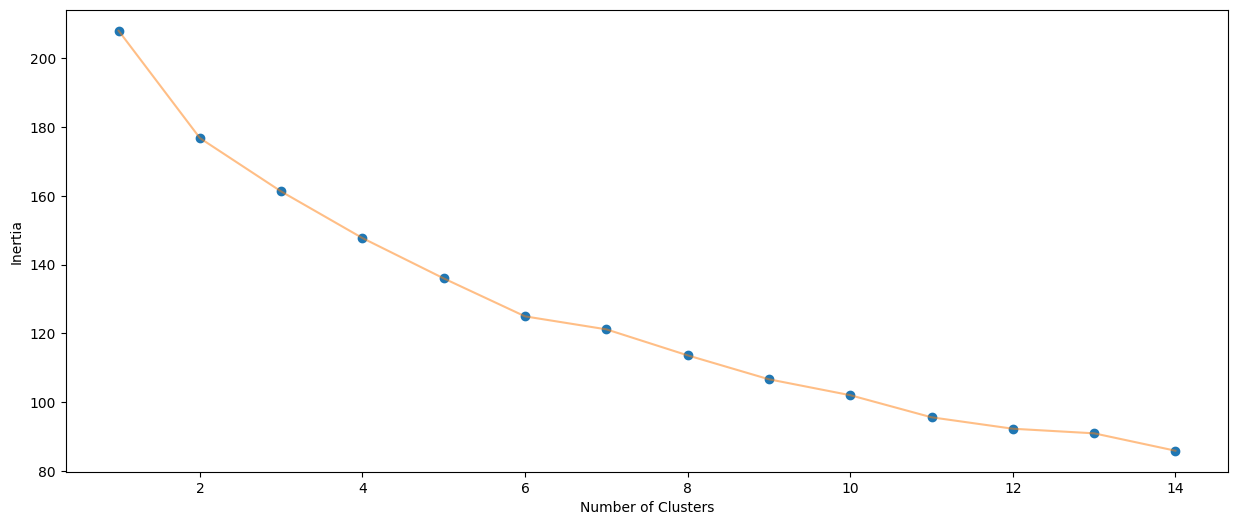

In [20]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [21]:
kmeans2 = KMeans(n_clusters=2, init='k-means++')
kmeans2.fit(df_no)
pred2 = kmeans2.predict(df_no)

kmeans4 = KMeans(n_clusters=4, init='k-means++')
kmeans4.fit(df_no)
pred4 = kmeans4.predict(df_no)

kmeans8 = KMeans(n_clusters=8, init='k-means++')
kmeans8.fit(df_no)
pred8 = kmeans8.predict(df_no)


kmeans16 = KMeans(n_clusters=16, init='k-means++')
kmeans16.fit(df_no)
pred16 = kmeans16.predict(df_no)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
frame = pd.DataFrame(df_no)
frame['cluster2'] = pred2
frame['cluster4'] = pred4
frame['cluster8'] = pred8
frame['cluster16'] = pred16

list_cat = ['cluster2','cluster4','cluster8','cluster16']

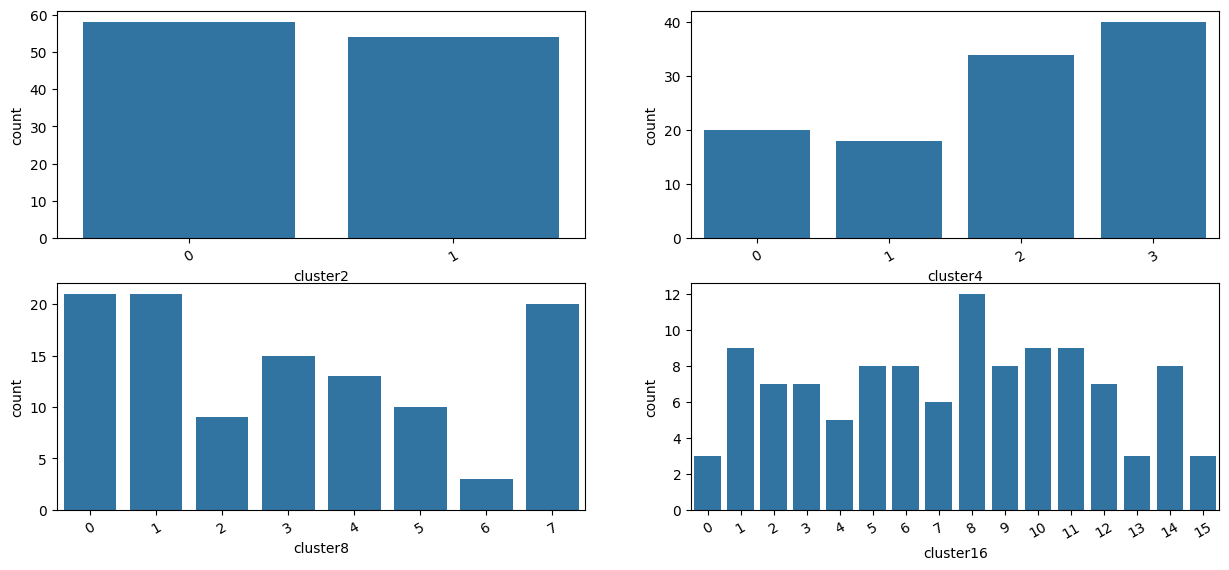

In [23]:
fig = plt.figure(figsize = (15,10))
axes = 320
for cat in list_cat:
  axes += 1
  fig.add_subplot(axes)
  sns.countplot(data = frame, x = cat)
  plt.xticks(rotation=30)
plt.show()

**Hierarchical Clustering (Agglomerative)**

- Method Lingage

- Cluster Number

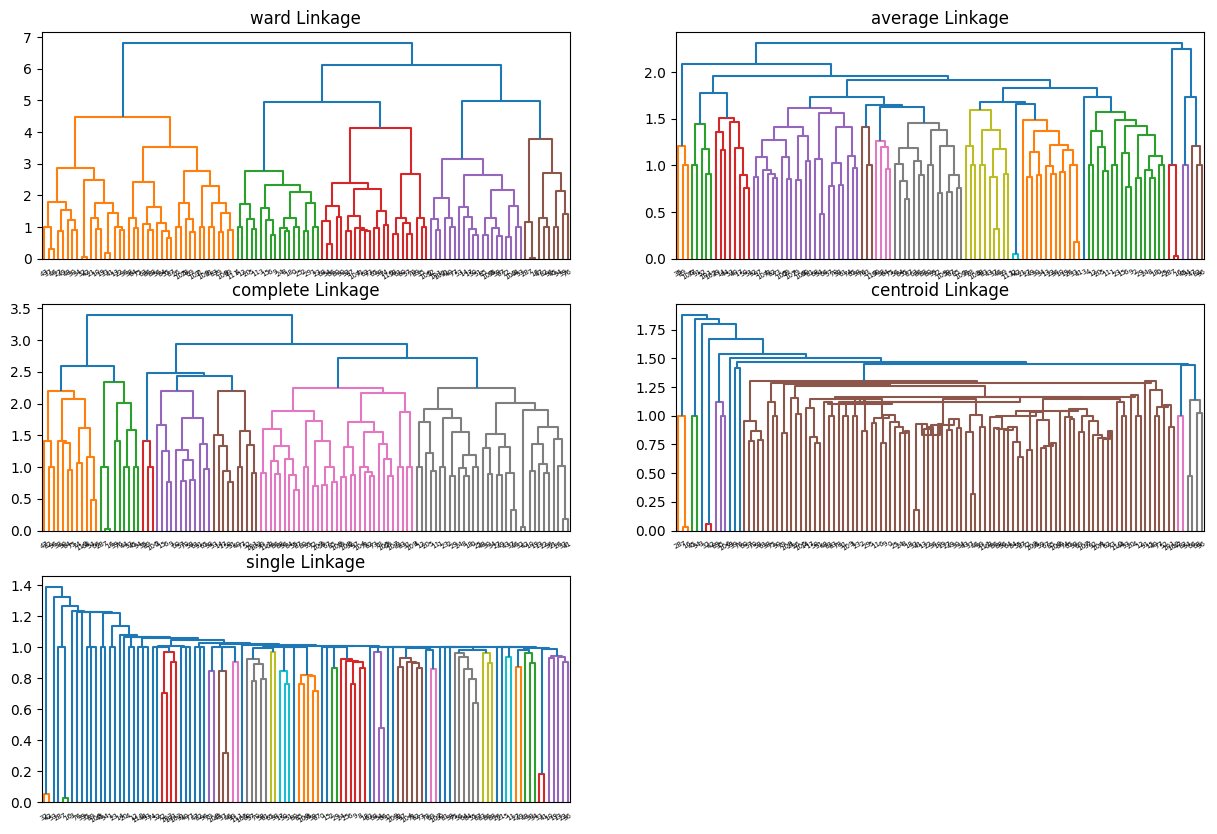

In [24]:
methode = ['ward','average','complete','centroid','single']
fig = plt.figure(figsize = (15,10))
axes = 320
for cat in methode:
  axes += 1
  fig.add_subplot(axes)
  plt.title(cat+" Linkage")
  dend=shc.dendrogram (shc.linkage (df_no, method=cat))
  plt.xticks(rotation=30)
plt.show()

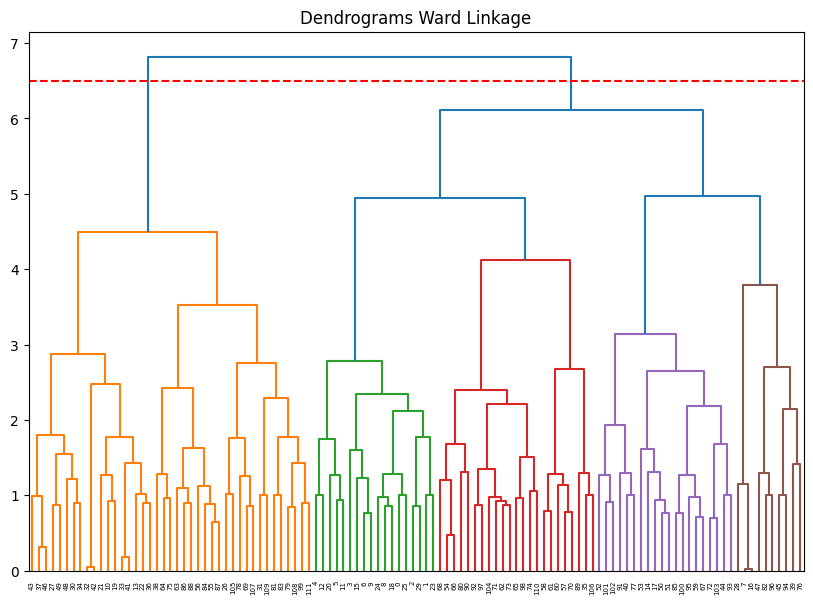

In [25]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms Ward Linkage")
dend=shc.dendrogram (shc.linkage (df_no, method='ward'))
plt.axhline (y=6.5, color='r', linestyle='--')

In [26]:
cluster=AgglomerativeClustering (n_clusters=2, affinity='euclidean', linkage='ward')
pred = cluster.fit_predict (df_no)

cluster4=AgglomerativeClustering (n_clusters=4, affinity='euclidean', linkage='ward')
pred4 = cluster4.fit_predict (df_no)

cluster8=AgglomerativeClustering (n_clusters=8, affinity='euclidean', linkage='ward')
pred8 = cluster8.fit_predict (df_no)

cluster16=AgglomerativeClustering (n_clusters=16, affinity='euclidean', linkage='ward')
pred16 = cluster16.fit_predict (df_no)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='cluster', ylabel='count'>

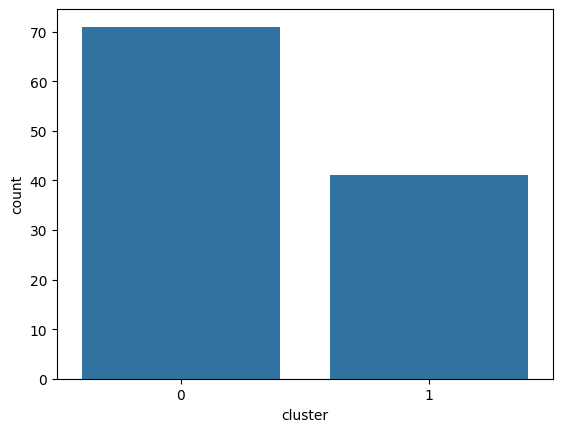

In [27]:
frame = pd.DataFrame(df_no)
frame['cluster'] = pred
sns.countplot(data = frame , x='cluster')

<Axes: xlabel='cluster', ylabel='count'>

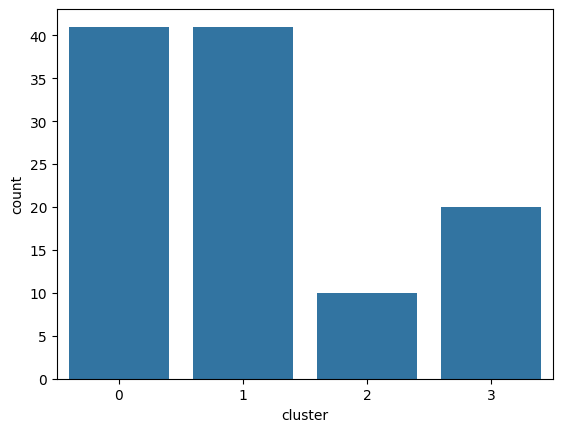

In [28]:
frame4 = pd.DataFrame(df_no)
frame4['cluster'] = pred4
sns.countplot(data = frame4 , x='cluster')

<Axes: xlabel='cluster', ylabel='count'>

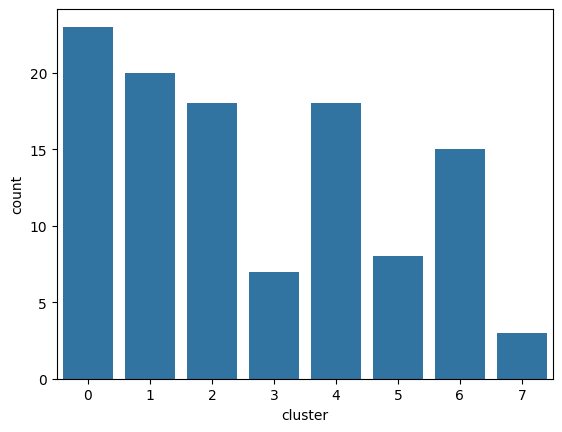

In [29]:
frame8 = pd.DataFrame(df_no)
frame8['cluster'] = pred8
sns.countplot(data = frame8 , x='cluster')

<Axes: xlabel='cluster', ylabel='count'>

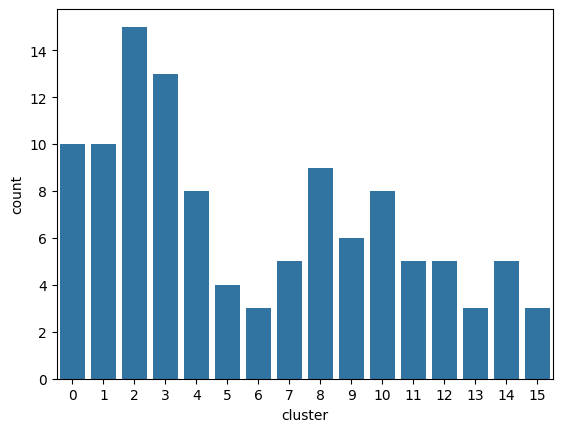

In [30]:
frame16 = pd.DataFrame(df_no)
frame16['cluster'] = pred16
sns.countplot(data = frame16 , x='cluster')

In [31]:
range_n_clusters = range(2, 15)
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Inisialisasi dan fitting model KMeans
    model = AgglomerativeClustering (n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    model.fit(df_no)

    # Prediksi label klaster
    labels = model.labels_

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(df_no, labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

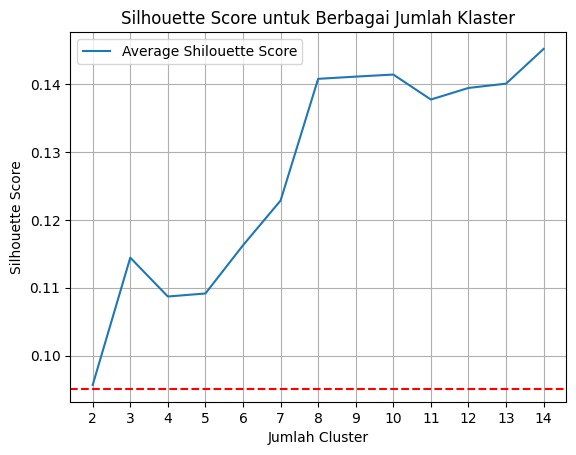

In [32]:
# Plotting
plt.plot(range_n_clusters, silhouette_scores,label='Average Shilouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Klaster')
plt.axhline (y=0.095, color='r', linestyle='--')
plt.xticks(range_n_clusters)
plt.legend()
plt.grid(True)
plt.show()

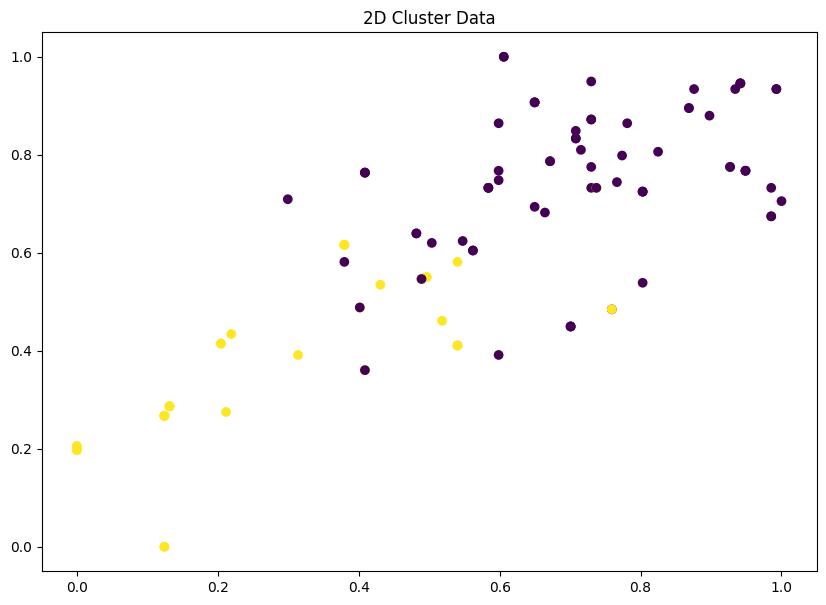

In [33]:
    plt.figure(figsize=(10,7))
plt.title('2D Cluster Data')
plt.scatter (frame['LightsleepN1andN2period'], frame['Totalsleeptime'], c=frame['cluster'])

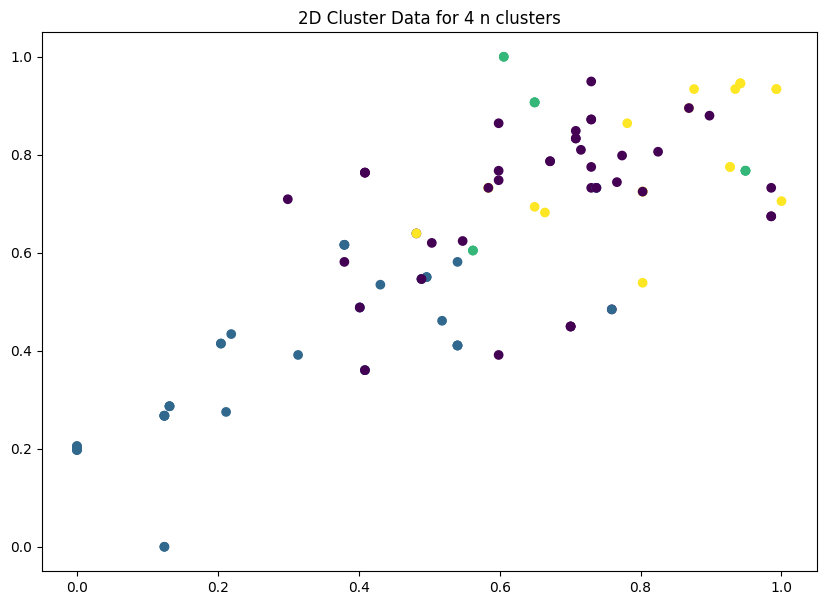

In [34]:
plt.figure(figsize=(10,7))
plt.title('2D Cluster Data for 4 n clusters')
plt.scatter (frame4['LightsleepN1andN2period'], frame4['Totalsleeptime'], c=frame4['cluster'])

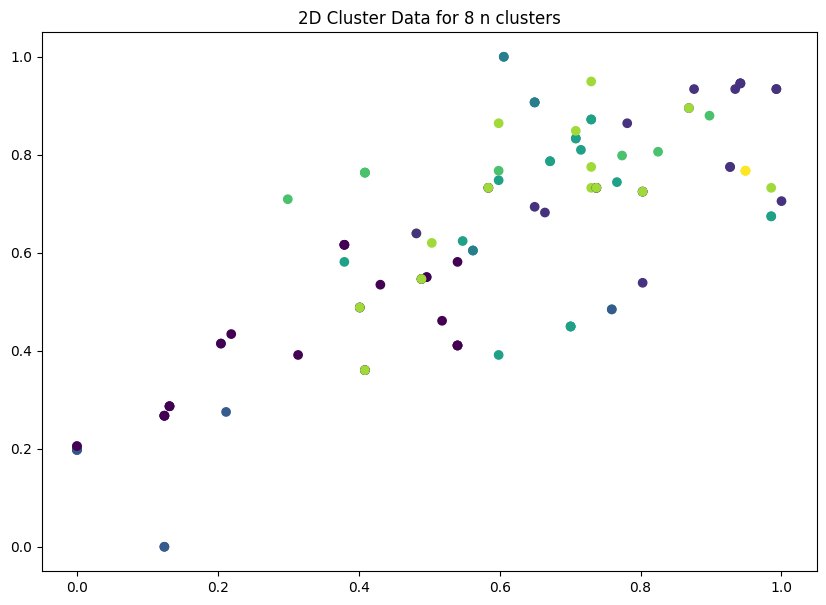

In [35]:
plt.figure(figsize=(10,7))
plt.title('2D Cluster Data for 8 n clusters')
plt.scatter (frame8['LightsleepN1andN2period'], frame8['Totalsleeptime'], c=frame8['cluster'])

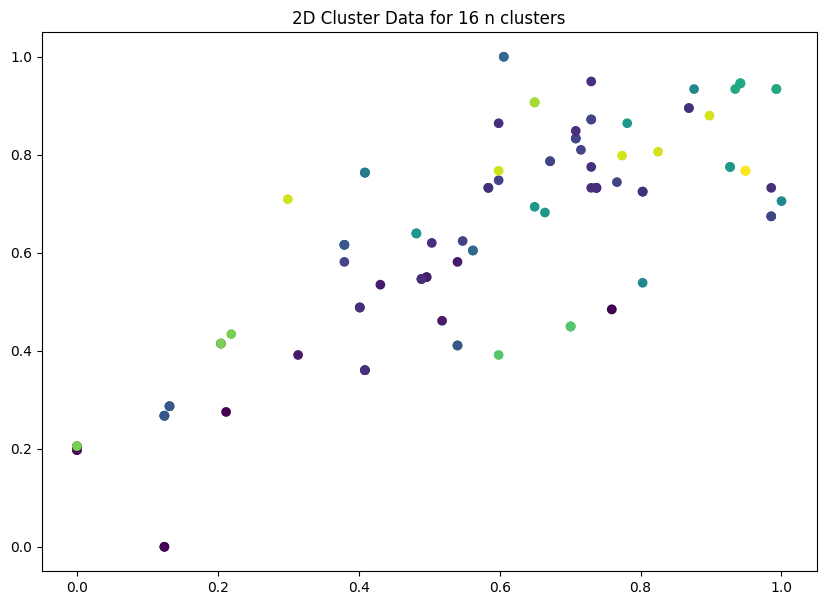

In [36]:
plt.figure(figsize=(10,7))
plt.title('2D Cluster Data for 16 n clusters')
plt.scatter (frame16['LightsleepN1andN2period'], frame16['Totalsleeptime'], c=frame16['cluster'])

Text(0.5, 0.92, '3D Cluster Data')

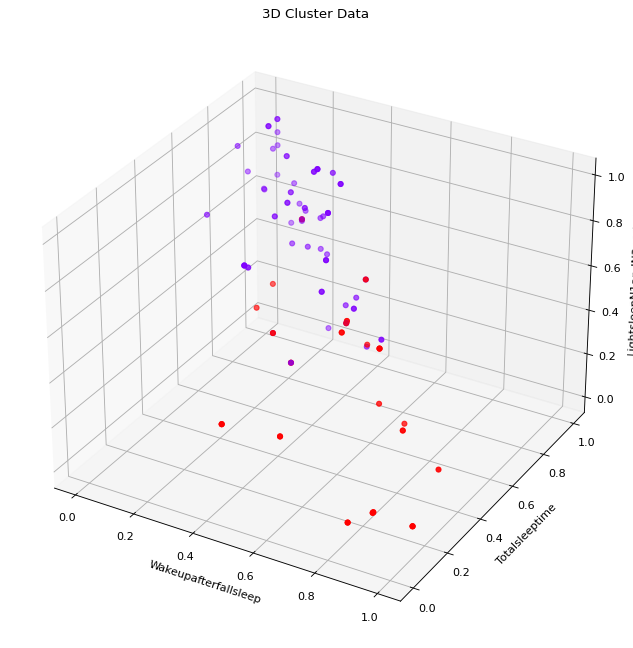

In [37]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes (projection="3d")
ax.scatter3D(frame['Wakeupafterfallsleep'], frame['Totalsleeptime'], frame['LightsleepN1andN2period'], c=frame['cluster'], cmap='rainbow')
xLabel = ax.set_xlabel('Wakeupafterfallsleep')
yLabel = ax.set_ylabel('Totalsleeptime')
zLabel = ax.set_zlabel('LightsleepN1andN2period')
plt.title('3D Cluster Data')

Text(0.5, 0.92, '3D Cluster Data for 4 n clusters')

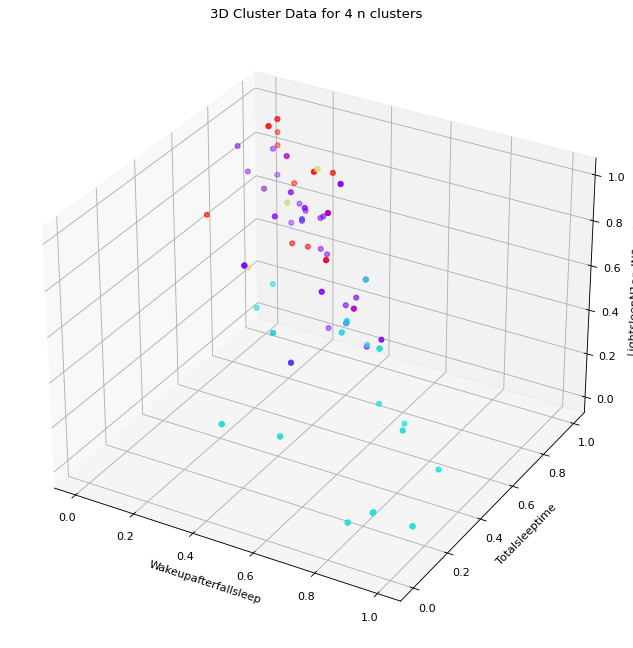

In [38]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes (projection="3d")
ax.scatter3D(frame4['Wakeupafterfallsleep'], frame4['Totalsleeptime'], frame4['LightsleepN1andN2period'], c=frame4['cluster'], cmap='rainbow')
xLabel = ax.set_xlabel('Wakeupafterfallsleep')
yLabel = ax.set_ylabel('Totalsleeptime')
zLabel = ax.set_zlabel('LightsleepN1andN2period')
plt.title('3D Cluster Data for 4 n clusters')

Text(0.5, 0.92, '3D Cluster Data for 8 n clusters')

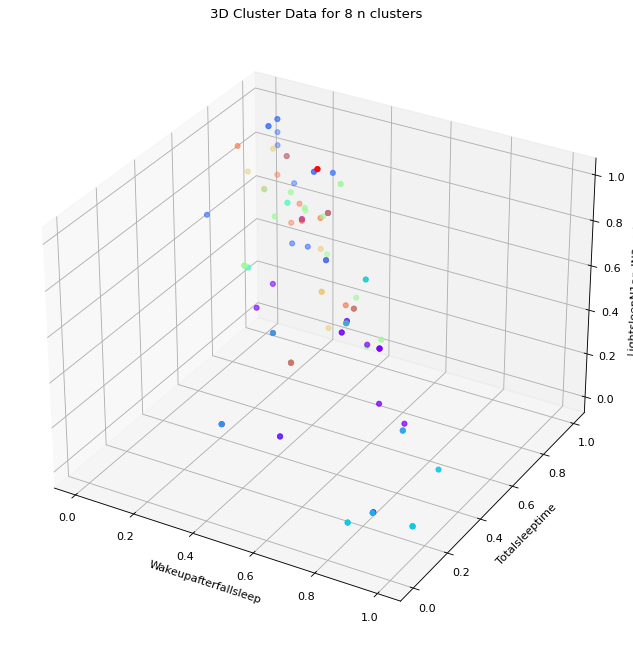

In [39]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes (projection="3d")
ax.scatter3D(frame8['Wakeupafterfallsleep'], frame8['Totalsleeptime'], frame8['LightsleepN1andN2period'], c=frame8['cluster'], cmap='rainbow')
xLabel = ax.set_xlabel('Wakeupafterfallsleep')
yLabel = ax.set_ylabel('Totalsleeptime')
zLabel = ax.set_zlabel('LightsleepN1andN2period')
plt.title('3D Cluster Data for 8 n clusters')

Text(0.5, 0.92, '3D Cluster Data for 16 n clusters')

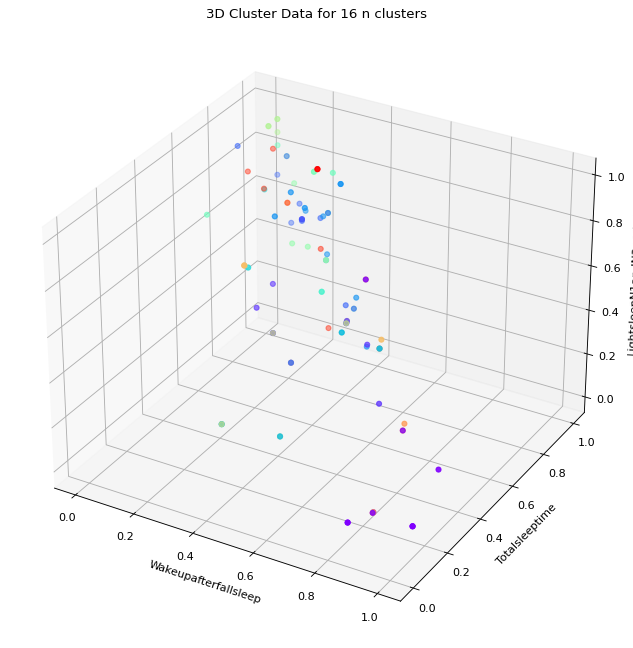

In [40]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes (projection="3d")
ax.scatter3D(frame16['Wakeupafterfallsleep'], frame16['Totalsleeptime'], frame16['LightsleepN1andN2period'], c=frame16['cluster'], cmap='rainbow')
xLabel = ax.set_xlabel('Wakeupafterfallsleep')
yLabel = ax.set_ylabel('Totalsleeptime')
zLabel = ax.set_zlabel('LightsleepN1andN2period')
plt.title('3D Cluster Data for 16 n clusters')

In [41]:
frame.columns

Index(['Group', 'Age', 'Weight', 'BMI', 'Sex', 'Height', 'MinHR', 'AverageHR',
       'MaxHR', 'SleeptimeawakeHR', 'SleeptimeHRprofileREM',
       'SleeptimeHRprofileN1andN2', 'SleeptimeHRprofileN3', 'LF', 'HF',
       'LFHFratio', 'IBI', 'SDNN', 'HTI', 'RMSSD', 'PNN50',
       'Sleeplatencyperiod', 'Wakeupafterfallsleep', 'Remperiod',
       'LightsleepN1andN2period', 'DeepsleepN3period', 'Sleepefficiency',
       'Totalsleepmonitoringtimemins', 'Totalsleeptime', 'cluster'],
      dtype='object')

<Axes: >

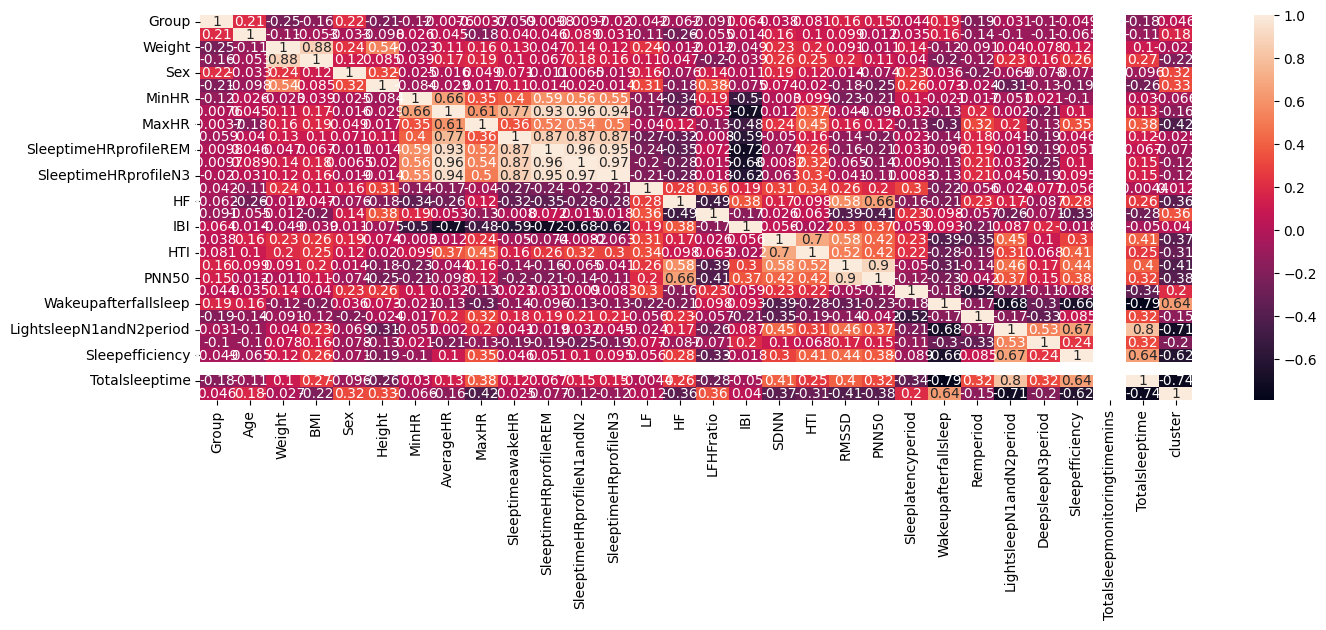

In [42]:
#Visualize Fiture Correlation
plt.figure(figsize=(16, 5))
sns.heatmap(frame.corr(),annot=True)

<Axes: >

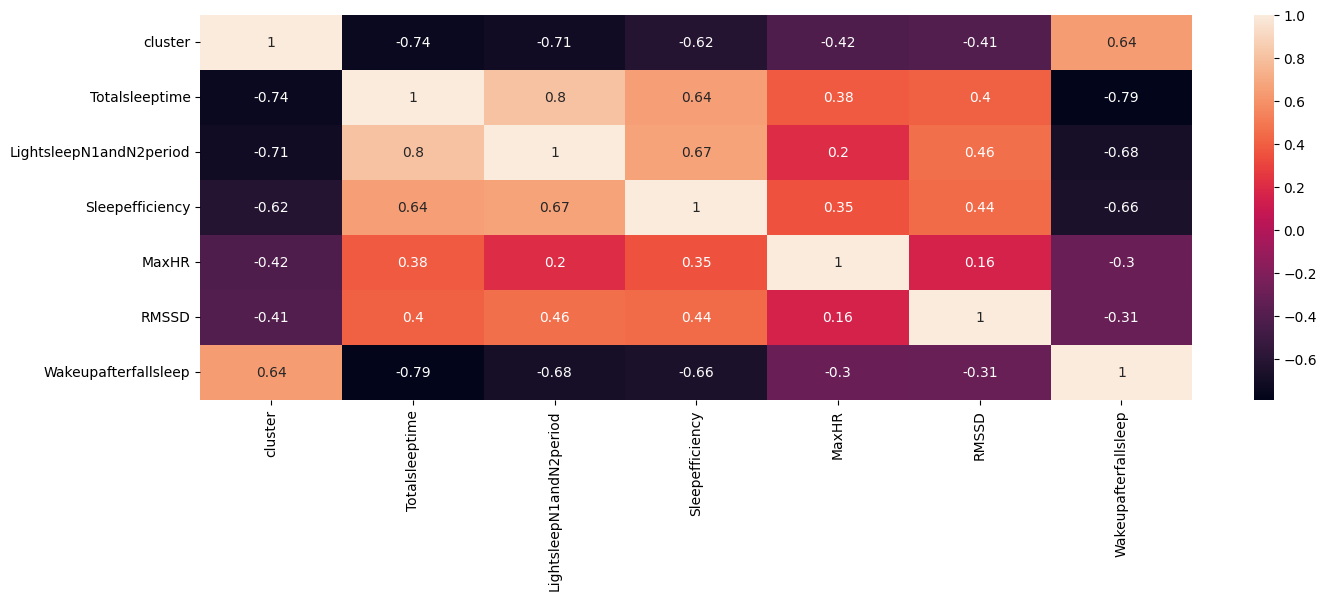

In [43]:
df= frame[['cluster','Totalsleeptime','LightsleepN1andN2period','Sleepefficiency','MaxHR','RMSSD','Wakeupafterfallsleep']]
#Visualize Fiture Correlation
plt.figure(figsize=(16, 5))
sns.heatmap(df.corr(),annot=True)

In [44]:
#Select Fiture, Konfigurasi Komposisi Train & Test
X=df.drop(columns=['cluster'])
Y=df[['cluster']]


# Inisialisasi KFold Cross-Validation dengan k=10 (menurut Jurnal)
kfold = KFold(n_splits=10, shuffle=True, random_state=2)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]


# Pisahkan data train menjadi train dan validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted)  #Confusion Matrix
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()

    print('accuracy score :',accuracy_score(y_true, y_predicted))
    print('Classification Report :',classification_report(y_true, y_predicted))

accuracy score : 0.9090909090909091
Classification Report :               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



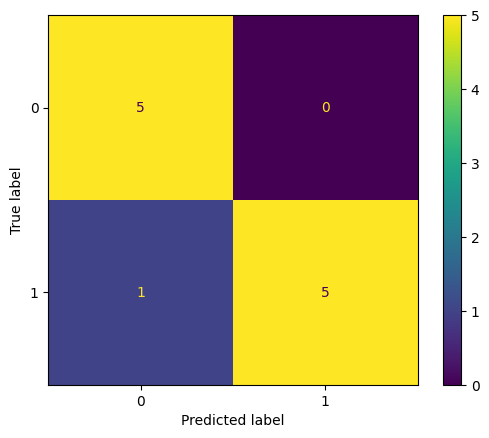

In [46]:
#Decision Tree Model , Evaluation Data
DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=4)
DT.fit(X_train, y_train)
y_predicted=DT.predict(X_test)
eval_model(y_test,y_predicted)

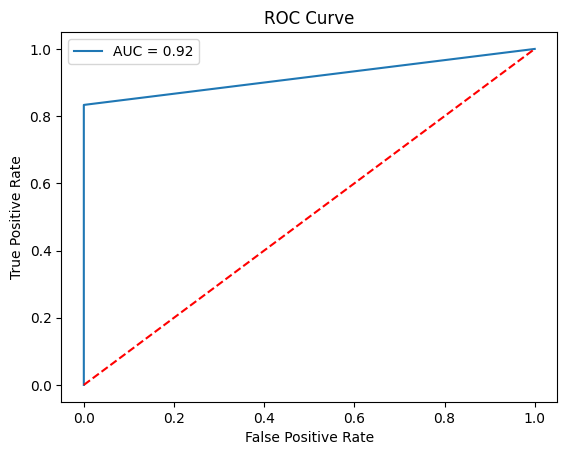

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

# Menghitung Area Under ROC Curve (AUC)
auc = roc_auc_score(y_test, y_predicted)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

[Text(0.5555555555555556, 0.875, 'x[0] <= 0.628\nentropy = 0.934\nsamples = 80\nvalue = [52, 28]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 0.551\nentropy = 0.776\nsamples = 35\nvalue = [8, 27]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 0.347\nentropy = 0.555\nsamples = 31\nvalue = [4, 27]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.837\nsamples = 15\nvalue = [4, 11]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7777777777777778, 0.625, 'x[3] <= 0.164\nentropy = 0.154\nsamples = 45\nvalue = [44, 1]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.74\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5555555555555556, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0]')]

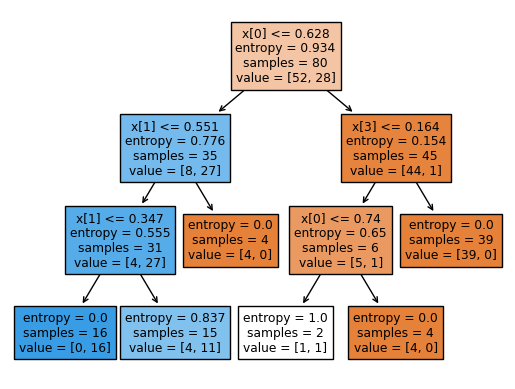

In [48]:
plot_tree(DT, filled=True)

<ipython-input-49-d224a4644620>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


accuracy score : 0.9090909090909091
Classification Report :               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



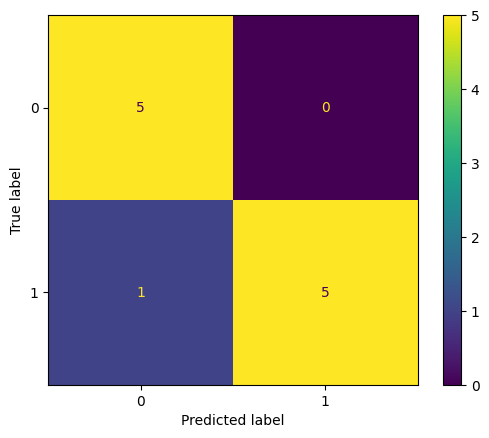

In [49]:
#Random Forest Model , Evaluation Data
RF = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
RF.fit(X_train, y_train)
y_predicted=RF.predict(X_test)
eval_model(y_test,y_predicted)

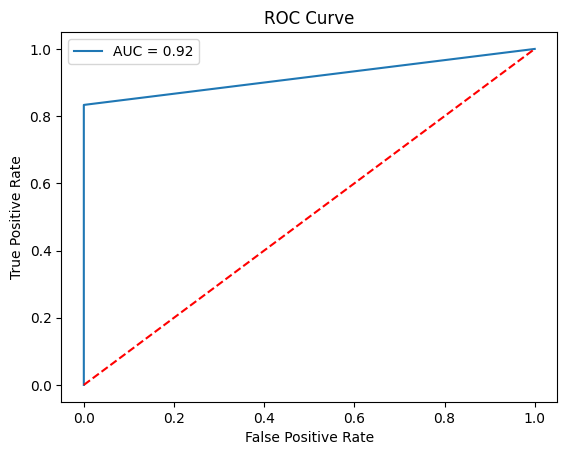

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

# Menghitung Area Under ROC Curve (AUC)
auc = roc_auc_score(y_test, y_predicted)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

[Text(0.6, 0.875, 'x[1] <= 0.551\nentropy = 0.945\nsamples = 50\nvalue = [51, 29]'),
 Text(0.4, 0.625, 'x[4] <= 0.18\nentropy = 0.602\nsamples = 21\nvalue = [5, 29]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 8\nvalue = [0, 19]'),
 Text(0.6, 0.375, 'x[3] <= 0.345\nentropy = 0.918\nsamples = 13\nvalue = [5, 10]'),
 Text(0.4, 0.125, 'entropy = 0.684\nsamples = 10\nvalue = [2, 9]'),
 Text(0.8, 0.125, 'entropy = 0.811\nsamples = 3\nvalue = [3, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 29\nvalue = [46, 0]')]

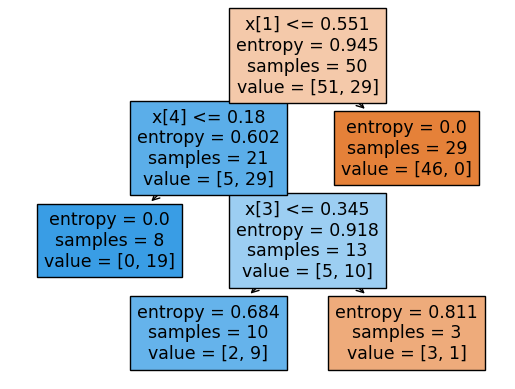

In [51]:
estimatorsRF = RF.estimators_[5]
plot_tree(estimatorsRF, filled=True)

In [52]:
#Random Forest Model , Evaluation Data
DT12 = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=2)
DT12.fit(X_train, y_train)
DT12pred=DT12.predict(X_test)

DT24 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=4)
DT24.fit(X_train, y_train)
DT24pred=DT24.predict(X_test)

DT48 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=8)
DT48.fit(X_train, y_train)
DT48pred=DT48.predict(X_test)

DT816 = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=16)
DT816.fit(X_train, y_train)
DT816pred=DT816.predict(X_test)

DT1632 = DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_split=32)
DT1632.fit(X_train, y_train)
DT1632pred=DT1632.predict(X_test)

In [53]:
#Random Forest Model , Evaluation Data
RF12 = RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_split=2)
RF12.fit(X_train, y_train)
RF12pred=RF12.predict(X_test)

RF24 = RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=4)
RF24.fit(X_train, y_train)
RF24pred=RF24.predict(X_test)

RF48 = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=8)
RF48.fit(X_train, y_train)
RF48pred=RF48.predict(X_test)

RF816 = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=16)
RF816.fit(X_train, y_train)
RF816pred=RF816.predict(X_test)

RF1632 = RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_split=32)
RF1632.fit(X_train, y_train)
RF1632pred=RF1632.predict(X_test)

<ipython-input-53-d05b3e145fec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF12.fit(X_train, y_train)
<ipython-input-53-d05b3e145fec>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF24.fit(X_train, y_train)
<ipython-input-53-d05b3e145fec>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF48.fit(X_train, y_train)
<ipython-input-53-d05b3e145fec>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF816.fit(X_train, y_train)
<ipython-input-53-d05b3e145fec>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [54]:
eva_mat_RF = pd.DataFrame()
eva_mat_RF['model']=['RF12','RF24','RF48','RF816','RF1632']
eva_mat_RF['accuracy'] = [accuracy_score(y_test, RF12pred),accuracy_score(y_test, RF24pred),accuracy_score(y_test, RF48pred),accuracy_score(y_test, RF816pred),accuracy_score(y_test, RF1632pred)]
eva_mat_RF['matthews_corrcoef'] = [matthews_corrcoef(y_test, RF12pred),matthews_corrcoef(y_test, RF24pred),matthews_corrcoef(y_test, RF48pred),matthews_corrcoef(y_test, RF816pred),matthews_corrcoef(y_test, RF1632pred)]

eva_mat_RF

,model,accuracy,matthews_corrcoef
0,RF12,0.909091,0.833333
1,RF24,0.909091,0.833333
2,RF48,0.909091,0.833333
3,RF816,0.909091,0.833333
4,RF1632,0.909091,0.833333


In [55]:
eva_mat_DT = pd.DataFrame()
eva_mat_DT['model']=['DT12','DT24','DT48','DT816','DT1632']
eva_mat_DT['accuracy'] = [accuracy_score(y_test, DT12pred),accuracy_score(y_test, DT24pred),accuracy_score(y_test, DT48pred),accuracy_score(y_test, DT816pred),accuracy_score(y_test, DT1632pred)]
eva_mat_DT['matthews_corrcoef'] = [matthews_corrcoef(y_test, DT12pred),matthews_corrcoef(y_test, DT24pred),matthews_corrcoef(y_test, DT48pred),matthews_corrcoef(y_test, DT816pred),matthews_corrcoef(y_test, DT1632pred)]

eva_mat_DT

,model,accuracy,matthews_corrcoef
0,DT12,0.909091,0.833333
1,DT24,0.909091,0.833333
2,DT48,0.909091,0.833333
3,DT816,0.909091,0.833333
4,DT1632,0.909091,0.833333


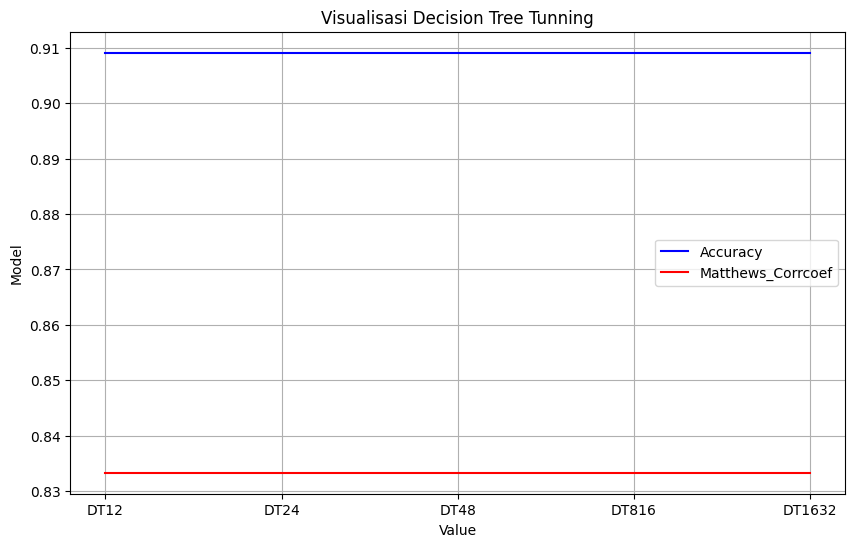

In [56]:
plt.figure(figsize=(10, 6))
# Scatter plot untuk Variabel_1
plt.plot(eva_mat_DT['model'], eva_mat_DT['accuracy'], color='blue', label='Accuracy')

# Scatter plot untuk Variabel_2
plt.plot(eva_mat_DT['model'], eva_mat_DT['matthews_corrcoef'], color='red', label='Matthews_Corrcoef')

plt.title('Visualisasi Decision Tree Tunning')
plt.xlabel('Value')
plt.ylabel('Model')
plt.legend()
plt.grid(True)
plt.show()

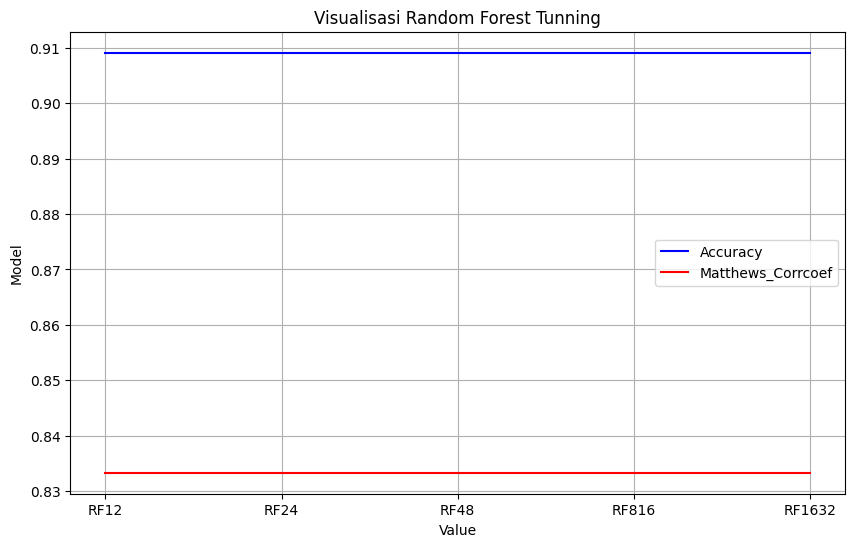

In [57]:
plt.figure(figsize=(10, 6))
# Scatter plot untuk Variabel_1
plt.plot(eva_mat_RF['model'], eva_mat_RF['accuracy'], color='blue', label='Accuracy')

# Scatter plot untuk Variabel_2
plt.plot(eva_mat_RF['model'], eva_mat_RF['matthews_corrcoef'], color='red', label='Matthews_Corrcoef')

plt.title('Visualisasi Random Forest Tunning')
plt.xlabel('Value')
plt.ylabel('Model')
plt.legend()
plt.grid(True)
plt.show()

# **Test New Data**

accuracy score : 0.8571428571428571
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.75      0.86      0.80         7

    accuracy                           0.86        21
   macro avg       0.84      0.86      0.84        21
weighted avg       0.87      0.86      0.86        21



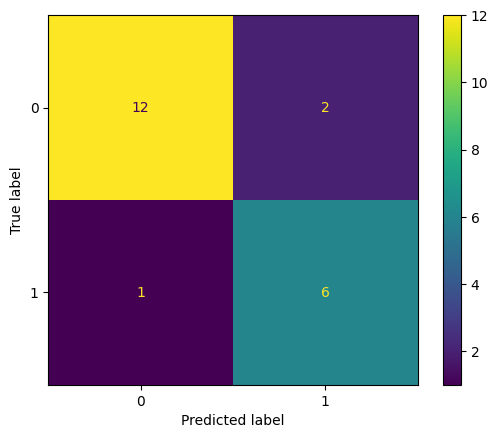

In [58]:
y_predictedDT=DT.predict(X_val)
eval_model(y_val,y_predictedDT)

accuracy score : 0.8571428571428571
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.75      0.86      0.80         7

    accuracy                           0.86        21
   macro avg       0.84      0.86      0.84        21
weighted avg       0.87      0.86      0.86        21



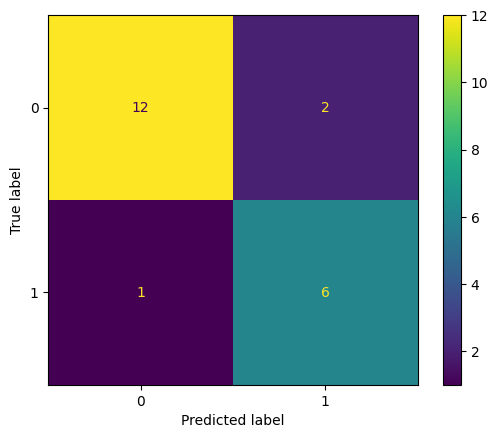

In [59]:
y_predictedRF=RF.predict(X_val)
eval_model(y_val,y_predictedRF)

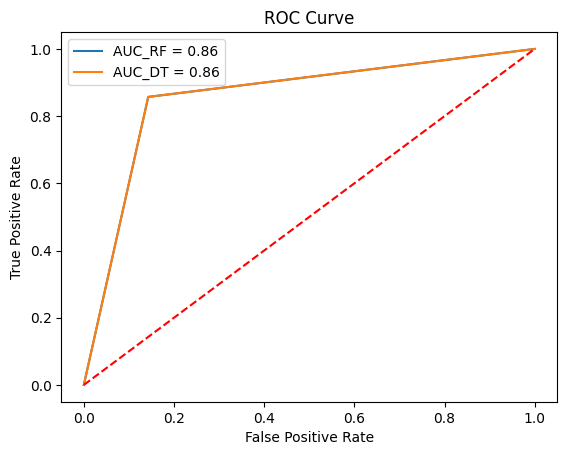

In [60]:
fpr, tpr, thresholds = roc_curve(y_val, y_predictedRF)
fpr1, tpr1, thresholds1 = roc_curve(y_val, y_predictedDT)
# Menghitung Area Under ROC Curve (AUC)
auc_rf = roc_auc_score(y_val, y_predictedRF)
auc_dt = roc_auc_score(y_val, y_predictedDT)
# Plot ROC Curve
plt.plot(fpr, tpr, label=f'AUC_RF = {auc_rf:.2f}')
plt.plot(fpr, tpr, label=f'AUC_DT = {auc_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()